In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gld_data = pd.read_csv('gld_price_data.csv')

In [3]:
gld_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gld_data.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [5]:
gld_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gld_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gld_data.shape

(2290, 6)

In [13]:
gld_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [14]:
gld_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [16]:
print(gld_data.dtypes)

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object


(array([ 55., 232., 155., 383., 738., 257.,  73., 209., 161.,  27.]),
 array([ 70.       ,  81.4589996,  92.9179992, 104.3769988, 115.8359984,
        127.294998 , 138.7539976, 150.2129972, 161.6719968, 173.1309964,
        184.589996 ]),
 <BarContainer object of 10 artists>)

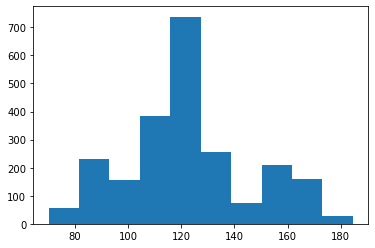

In [23]:
plt.hist(gld_data['GLD'], bins = 10)

<AxesSubplot:>

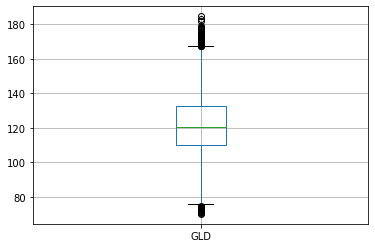

In [17]:
gld_data.boxplot(column=['GLD']) 

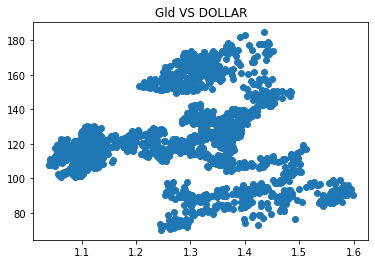

In [20]:
plt.scatter(x=gld_data['EUR/USD'],y=gld_data['GLD'])
plt.title('Gld VS DOLLAR')
plt.show()

<AxesSubplot:xlabel='EUR/USD', ylabel='GLD'>

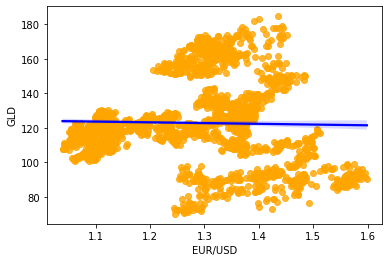

In [3]:
sns.regplot(x='EUR/USD',y='GLD',data=gld_data , scatter_kws={"color":"orange"}, line_kws={"color":"blue"})

<AxesSubplot:xlabel='USO', ylabel='GLD'>

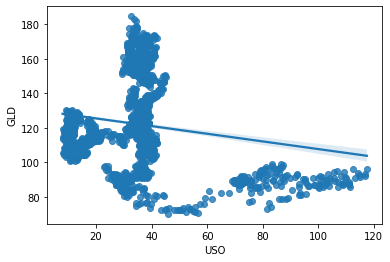

In [22]:
sns.regplot(x="USO", y="GLD", data=gld_data)

In [24]:
#Correlation matrix
gld_data.corr(method ='pearson')

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [25]:
#Correlation matrix
gld_data.corr(method ='kendall')

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.068464,-0.452496,-0.143325,-0.436392
GLD,0.068464,1.000000,0.015412,0.674810,0.042871
USO,-0.452496,0.015412,1.000000,0.256906,0.630167
SLV,-0.143325,0.674810,0.256906,1.000000,0.249607
EUR/USD,-0.436392,0.042871,0.630167,0.249607,1.000000


In [26]:
correlation = gld_data.corr()

<AxesSubplot:>

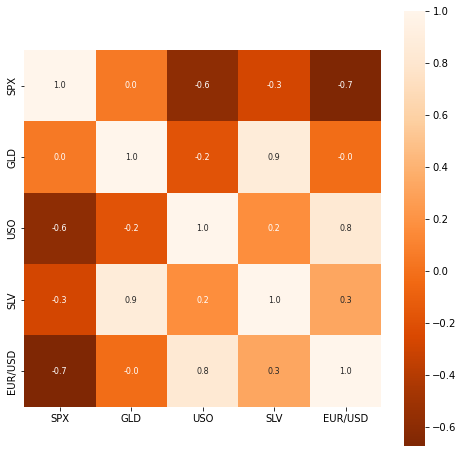

In [48]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Oranges_r')

In [30]:

# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

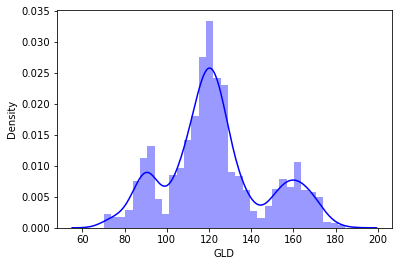

In [33]:
sns.distplot(gld_data['GLD'],color='blue')

In [34]:
X = gld_data.drop(['Date','GLD'],axis=1)
Y = gld_data['GLD']
     

In [35]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [36]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [38]:
regressor = RandomForestRegressor(n_estimators=100)

In [39]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [40]:
test_data_prediction = regressor.predict(X_test)

In [41]:
print(test_data_prediction)

[168.61529912  81.98679989 116.00760031 127.6764008  120.66510131
 154.67039774 150.62959831 126.07840031 117.3857987  126.09220051
 116.78480108 171.62850069 141.17689811 167.72629833 115.21940006
 117.62600043 139.21550293 170.20960116 159.85120267 158.31639958
 155.23189994 125.55200029 174.99399941 157.22470354 125.10150046
  93.72829971  77.52220007 120.65120032 119.16019966 167.63929929
  87.99070075 125.05549988  91.0583007  117.69300013 121.20479924
 136.49830071 115.30980117 115.29050087 146.70709986 107.35740095
 104.87610266  87.28579799 126.54230009 118.03670009 153.51199846
 119.52060016 108.21560008 108.11069813  93.19400025 127.22869741
  74.92150041 113.6289994  121.31889997 111.32809909 118.71749847
 120.97489926 159.1669999  169.26990111 147.39569638  85.67809848
  94.30990013  86.72309896  90.51690011 119.16500047 126.38210066
 127.57360036 168.83739971 122.31969956 117.46859854  98.37470047
 168.19920096 143.01589866 132.0930026  121.2574025  121.38389926
 119.75500

In [42]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9896800527642226


In [43]:
Y_test = list(Y_test)

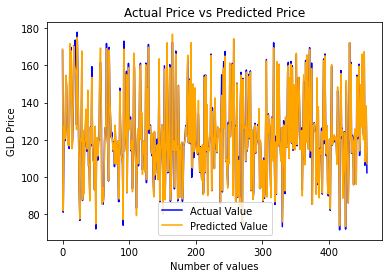

In [49]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='orange', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()